## Final Project Submission

Please fill out:
* Student name: Cleophas Opati Orembe
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Analysis of the Current Movie Industry
## Introduction
The movie industry is one of the most lucrative industries in the world right now making it one of the most significant contributors to the global economy. The only main downfall that this industry has first after its conception is the 2020 COVID-19 pandemic where the lockdown prevented people from going to cinemas and also prevented the production of more films. It is reported that most companies had to suspend their filming processes and the launching of new films due to the measures that the government had taken to contain the virus. Apart from this challenge, the film industry has been experiencing tremendous growth over the years. It is projected that in 2022 alone, the domestic box office in the United States generated a revenue of nearly 6 billion US dollars. Furthermore, the global revenue industry recorded a revenue of 77 billion US dollars in 2022 alone (Elad, 2023). Thus, this proves how lucrative the film industry is. As a result, there is a need to analyse the current data available regarding the industry to ensure that Microsoft can get actionable insights when venturing to the movie industry. 

## Business Problem  or  Understanding
Microsoft, one of the largest technology companies in the world wants to join the movie industry but the company lacks the knowledge on where to begin. Therefore, there is a need to help the company make the right decisions regarding this venture.  After being consulted to help the company in joining this venture, I started by looking at movies that performed well over the past decade. This analysis is important because it would help the company to invest in films that would bring out the highest possible ROI.  

The overall research question or objective of the project would be:
1.	What makes a movie successful?

The analysis will be based on the following factors:
1.	Examine the most successful movie content in the world right now. This is based on the type of movie or genre that people prefer watching;
2.	Evaluate the best budget that is needed to provide the highest grossing movie in the world or the one with the highest rating;
3.	Determine the best time of the year to release a particular movie;
4.	Lastly, to examine other factors or any additional attributes that successful movies usually share. 
Evaluating the above objectives will play a key role in ensuring that the business problem is solved accordingly and will help Microsoft to make a sound decision. The objectives were determined after perusing through the provided data. 

## Data Understanding and Analysis


In [18]:
#The first step will be to import the needed tools for the project.Therefore,

import pandas as pd

#Also, there is a need to set pandas in a particular display to ensure that it ddoes not have scientific notation the dataframes
pd.options.display.float_format = '{:.2f}'.format

#After that, other tools will be imported too:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

%matplotlib inline


There are various factors that can be used to determine the most successful movie content. For instance, the movie genre, and the movie  language. When most people speak a particular language, they would like to  watch that movie in their prefered language. Thus, it is important to consider a movie language because it might affect its viewership.

In [19]:
import os
file_name = 'tn.movie_budgets.csv'
current_dir = os.getcwd()
file_path = os.path.join(current_dir, file_name)
file_path


'C:\\Users\\user\\Documents\\Flatiron\\Phase 1 Project\\dsc-phase-1-project-v2-4\\tn.movie_budgets.csv'

In [30]:
movie_budget_df = pd.read_csv("ZippedData/tn.movie_budgets.csv.gz")
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [32]:
movie_budget_df.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


In [143]:
import sqlite3
conn = sqlite3.connect('imm.db')

In [144]:
cur = conn.cursor()

In [145]:
database = 'imm.db'
connection = sql.connect(database)

In [146]:
query = '''SELECT * FROM imm'''

In [151]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('imm.db')  
# Create a cursor object
cursor = conn.cursor()

# Fetch the table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Loop through the table names and fetch the data from each table
for table in table_names:
    table_name = table[0]
    print(f"Table Name: {table_name}")
    query = f"SELECT * FROM {table_name};"
    data_frame = pd.read_sql_query(query, conn)
    display(data_frame)  # Display the data in a tabular format

# Close the cursor and connection
cursor.close()
conn.close()


Table Name: movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


Table Name: directors


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


Table Name: known_for


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


Table Name: movie_akas


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.00
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.00
331700,tt9880178,1,La atención,None,None,original,None,1.00
331701,tt9880178,2,La atención,ES,None,None,None,0.00


Table Name: movie_ratings


,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


Table Name: persons


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


Table Name: principals


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


Table Name: writers


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [168]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('imm.db')
cursor = conn.cursor()

# Execute an SQL query to join or combine tables with column headings or aliases
cursor.execute('''
    SELECT movie_ratings.movie_id AS movie_id,
           movie_ratings.averagerating AS average_rating,
           movie_basics.primary_title AS title,
           movie_basics.genres AS genres
    FROM movie_ratings
    INNER JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
''')

# Fetch the combined results
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()

# Process the combined results as needed





('tt10356526', 8.3, 'Laiye Je Yaarian', 'Romance')
('tt10384606', 8.9, 'Borderless', 'Documentary')
('tt1042974', 6.4, 'Just Inès', 'Drama')
('tt1043726', 4.2, 'The Legend of Hercules', 'Action,Adventure,Fantasy')
('tt1060240', 6.5, 'Até Onde?', 'Mystery,Thriller')
('tt1069246', 6.2, 'Habana Eva', 'Comedy,Romance')
('tt1094666', 7.0, 'The Hammer', 'Biography,Drama,Sport')
('tt1130982', 6.4, 'The Night Clerk', 'Drama,Thriller')
('tt1156528', 7.2, 'Silent Sonata', 'Drama,War')
('tt1161457', 4.2, 'Vanquisher', 'Action,Adventure,Sci-Fi')
('tt1171222', 5.1, 'Baggage Claim', 'Comedy')
('tt1174693', 5.8, 'The Four-Faced Liar', 'Comedy,Drama,Romance')
('tt1181840', 7.0, 'Jack and the Cuckoo-Clock Heart', 'Adventure,Animation,Drama')
('tt1193623', 8.0, 'Buried Prayers', 'Documentary')
('tt1199588', 5.5, 'Black Widow', 'Thriller')
('tt1204784', 5.8, "Maverick and Ariel's First Ever Ever Movie Hollywood or Else... (Ang pinakamahabang title ng movie sa balat ng lupa)", 'Comedy')
('tt1210166', 7.6,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The above data has been used to show the type of movies that are being produced. Next we will check the appropriate language to be used in the movies. 

In [171]:
movie_language_df = pd.read_csv("ZippedData/tmdb.movies.csv.gz")
movie_language_df.head()



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [173]:
num_languages = movie_language_df['original_language'].unique() 
num_languages 

array(['en', 'nl', 'es', 'ja', 'sv', 'de', 'fr', 'cn', 'it', 'ru', 'zh',
       'hi', 'no', 'ko', 'da', 'fi', 'pl', 'te', 'hu', 'tr', 'pt', 'he',
       'fa', 'th', 'cs', 'et', 'tl', 'lt', 'xx', 'bs', 'ar', 'is', 'el',
       'mr', 'hr', 'ro', 'sr', 'uk', 'nb', 'hz', 'ca', 'bg', 'sl', 'lv',
       'si', 'ab', 'ta', 'bo', 'id', 'sq', 'bn', 'gu', 'lo', 'ne', 'kk',
       'hy', 'ps', 'kn', 'vi', 'ku', 'ka', 'ml', 'ur', 'mi', 'eu', 'sn',
       'cy', 'ha', 'ky', 'yi', 'pa', 'xh', 'cr', 'sw', 'af', 'dz'],
      dtype=object)

In [178]:
movie_language_df['original_language'].describe()

count     26517
unique       76
top          en
freq      23291
Name: original_language, dtype: object

In [196]:
movie_language_df['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

The above data shows that English is the most used language when producing movies. During production of movies, there is need to consider the language that is mostly prefered by the people. This will ensure that the movie gets more views. The information can be expressed in a graph as shown. However, the graph will only be used to show the top five languages used.

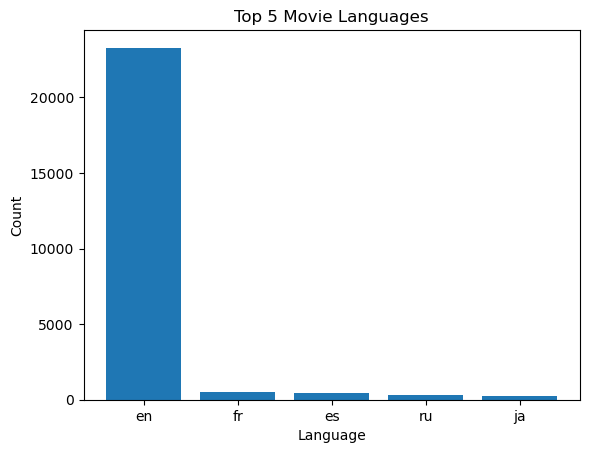

In [197]:
import matplotlib.pyplot as plt

# Get the value counts of 'original_language' column
language_counts = movie_language_df['original_language'].value_counts().head(5)

# Create a bar graph
plt.bar(language_counts.index, language_counts.values)

# Set x-axis label, y-axis label, and title
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 5 Movie Languages')

# Show the plot
plt.show()


### Objective 2: Evaluate the best budget that is needed to provide the highest grossing movie in the world

In this case, I will start by comparing the movie budgets and the income earned over the years. This is an important factor to consider because it helps in determining how the budget of a movie will affect its profitability. It is usually expected that a movie with a sufficient budget will perform well at the box office.

C:\Users\user\AppData\Local\Temp\ipykernel_6440\3167107695.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('[$,]', '').astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_6440\3167107695.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('[$,]', '').astype(float)


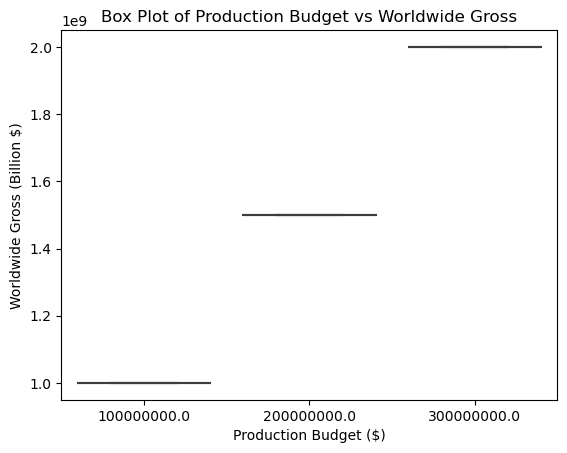

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movie_budget_df = pd.DataFrame(data)

# Remove dollar sign and comma from columns
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('[$,]', '').astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('[$,]', '').astype(float)

# Create a box plot
sns.boxplot(data=movie_budget_df, x='production_budget', y='worldwide_gross')

# Set the labels for x-axis and y-axis
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross (Billion $)')
plt.title('Box Plot of Production Budget vs Worldwide Gross')

# Show the plot
plt.show()

### Objective 3:Determine the best time of the year to release a particular movie
By just observing the data, one can easily notice that when movies are released in particular months, they tend to perform well as compared to others released during the other times of the year. In this case, I will make a comparison between the months and both the domestic and worldwide gross. 

In [96]:
movie_budget_df = pd.read_csv("ZippedData/tn.movie_budgets.csv.gz")
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Looking at the above data frame, one can easily realise that trying to make computations will be problematic. Therefore, there is a need to clean the data and make it is for manipulation. Due to this, the data will be cleaned as follows:

In [97]:
import pandas as pd

# Remove dollar signs from 'production_budget', 'domestic_gross', and 'worldwide_gross' columns
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('$', '').str.replace(',', '')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

# Convert columns to appropriate data types
movie_budget_df['production_budget'] = pd.to_numeric(movie_budget_df['production_budget'])
movie_budget_df['domestic_gross'] = pd.to_numeric(movie_budget_df['domestic_gross'])
movie_budget_df['worldwide_gross'] = pd.to_numeric(movie_budget_df['worldwide_gross'])

# Handle missing values, if any
# Drop duplicates, if any
movie_budget_df.drop_duplicates(inplace=True)

# Perform other data cleaning tasks as needed, such as handling outliers, correcting data formats, etc.

# Print the cleaned DataFrame
print(movie_budget_df)


      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  
0             425000000       760507625       2776345279  
1             410600000      

C:\Users\user\AppData\Local\Temp\ipykernel_6440\3600910941.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6440\3600910941.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
C:\Users\user\AppData\Local\Temp\ipykernel_6440\3600910941.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated a

In [99]:
import pandas as pd

# Convert 'release_date' column to datetime if it is not already
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

# Extract only the month from 'release_date' column
movie_budget_df['release_month'] = movie_budget_df['release_date'].dt.month

# Filter the DataFrame for movies released only in each month
january_movies_df = movie_budget_df[movie_budget_df['release_month'] == 1]
february_movies_df = movie_budget_df[movie_budget_df['release_month'] == 2]
march_movies_df = movie_budget_df[movie_budget_df['release_month'] == 3]
april_movies_df = movie_budget_df[movie_budget_df['release_month'] == 4]
may_movies_df = movie_budget_df[movie_budget_df['release_month'] == 5]
june_movies_df = movie_budget_df[movie_budget_df['release_month'] == 6]
july_movies_df = movie_budget_df[movie_budget_df['release_month'] == 7]
august_movies_df = movie_budget_df[movie_budget_df['release_month'] == 8]
september_movies_df = movie_budget_df[movie_budget_df['release_month'] == 9]
october_movies_df = movie_budget_df[movie_budget_df['release_month'] == 10]
november_movies_df = movie_budget_df[movie_budget_df['release_month'] == 11]
december_movies_df = movie_budget_df[movie_budget_df['release_month'] == 12]

# Display the results
print(january_movies_df.head())
print(february_movies_df.head())
print(march_movies_df.head())
print(april_movies_df.head())
print(may_movies_df.head())
print(june_movies_df.head())
print(july_movies_df.head())
print(august_movies_df.head())
print(september_movies_df.head())
print(october_movies_df.head())
print(november_movies_df.head())
print(december_movies_df.head())





     id release_date                       movie  production_budget  \
210  11   2016-01-29             Kung Fu Panda 3          140000000   
280  81   2017-01-13              Monster Trucks          125000000   
328  29   2011-01-14            The Green Hornet          110000000   
405   6   2012-01-20     Jin lÃ­ng shÃ­ san chai          100000000   
514  15   2017-01-20  xXx: Return of Xander Cage           85000000   

     domestic_gross  worldwide_gross  release_month  
210       143528619        517599142              1  
280        33370166         61642798              1  
328        98780042        229155503              1  
405          311434         98227017              1  
514        44898413        345033359              1  
     id release_date                movie  production_budget  domestic_gross  \
41   42   2018-02-16        Black Panther          200000000       700059566   
90   91   2015-02-06    Jupiter Ascending          179000000        47482519   
123  24  

To get a clear picture on how movies perform at different times of the year, there is a need to get the total budget of the movies during a particular month. This will also be done to the amount that was generated at the Box Office, both globally and locally.

In [102]:
# Extract the month from 'release_date' column
movie_budget_df['release_month'] = movie_budget_df['release_date'].dt.month

# Group the DataFrame by 'release_month' and calculate the sum of 'production_budget', 'domestic_gross', and 'worldwide_gross' for each month
monthly_sum_df = movie_budget_df.groupby('release_month')[['production_budget', 'domestic_gross', 'worldwide_gross']].sum()

# Create a new DataFrame with the monthly sums
monthly_sum_df.reset_index(inplace=True)

# Add a column 'Month_Name' to store the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sum_df['Month_Name'] = monthly_sum_df['release_month'].map(lambda x: month_names[x-1])

# Reorder the columns
monthly_sum_df = monthly_sum_df[['Month_Name', 'production_budget', 'domestic_gross', 'worldwide_gross']]

# Print the monthly sum table
print(monthly_sum_df)



   Month_Name  production_budget  domestic_gross  worldwide_gross
0     January         7232691000      8310517342      16157646936
1    February        10994196247     13882543926      28045454121
2       March        14467577021     18129303397      37897684431
3       April        10806485000     12407092932      27203797390
4         May        19184024596     27146065077      66043077615
5        June        20644478311     31531570976      68268531657
6        July        18720308775     26720337439      62023990453
7      August        12675822719     15955429870      30245291880
8   September        10753760847     11412894262      23019987786
9     October        11684993000     13994662807      28343193867
10   November        20703628016     28276049992      65970430672
11   December        24772446000     34345107925      75761412153


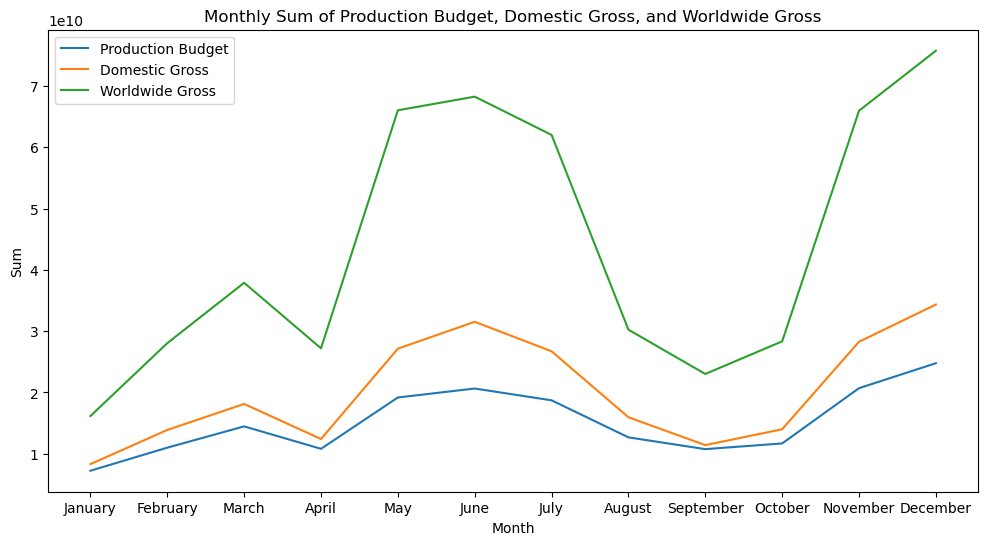

In [103]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a line graph with 'Month_Name' on the x-axis and 'production_budget', 'domestic_gross', and 'worldwide_gross' on the y-axis
plt.figure(figsize=(12, 6)) # Set the figure size
plt.plot(monthly_sum_df['Month_Name'], monthly_sum_df['production_budget'], label='Production Budget')
plt.plot(monthly_sum_df['Month_Name'], monthly_sum_df['domestic_gross'], label='Domestic Gross')
plt.plot(monthly_sum_df['Month_Name'], monthly_sum_df['worldwide_gross'], label='Worldwide Gross')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Sum')
plt.title('Monthly Sum of Production Budget, Domestic Gross, and Worldwide Gross')
plt.legend() # Add legend

# Show the plot
plt.show()


The above data shows that movies produced in around june attract most profits as compared to those that have been realeased in other months.

### Objective 4: Examine other factors or any additional attributes that successful movies usually share

There are other factors that usually affect how successful a movie will be, for instance, some directors tend to be more successful than others, hence the reason they tend to be hired by more companies. Thus, the data below will be used to analyse the most commmon directors used in the movie industry:

In [189]:
import pandas as pd

# File path to the .tsv file

file_path = r"C:\Users\user\Documents\Flatiron\Phase 1 Project\dsc-phase-1-project-v2-4\rt.movie_info.tsv"

# Read .tsv file into a DataFrame
df = pd.read_csv(file_path, sep="\t")

# Now you can access and manipulate the data in the DataFrame as needed
print(df.head())

df['director'].describe()

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

count                 1361
unique                1125
top       Steven Spielberg
freq                    10
Name: director, dtype: object

In [201]:
df['director'].value_counts()

Steven Spielberg      10
Clint Eastwood         8
William Friedkin       4
Curtis Hanson          4
William Beaudine       4
                      ..
Evans Butterworth      1
Jeannot Szwarc         1
Maroun Bagdadi         1
James Hogan            1
David Mickey Evans     1
Name: director, Length: 1125, dtype: int64

There are over 1,000 directors but the one who has been involved in many movies is Steven Spielberg. The fact that he has directed  more movies than the rest means that he is one of the best. Therefore, the company can consider working with him in the studio. The data can be presented as follows in a graph:

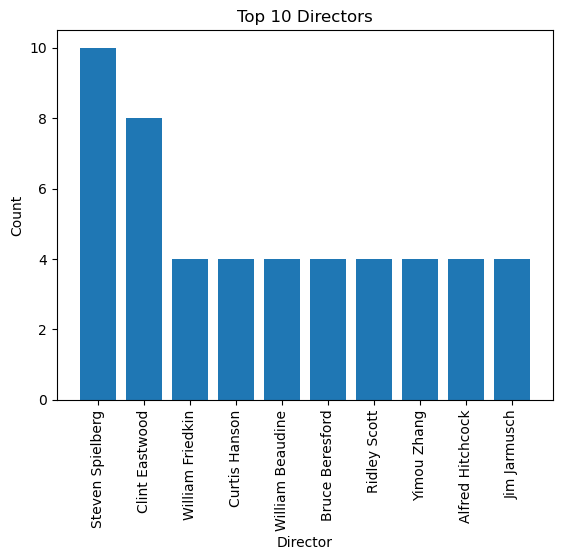

In [202]:
import matplotlib.pyplot as plt

# Get the value counts of 'director' column
director_counts = df['director'].value_counts().head(10)  # Limit to top 10 values

# Create a bar graph
plt.bar(director_counts.index, director_counts.values)

# Set x-axis label, y-axis label, and title
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Recommendations

After the analysis that has been done above, it is recommended that Microsoft should take the following course of action:
1.	For a start, the company should produce more movies in the English language. Thus, there is a need to first target the English speakers first, then venture to other languages.
2.	When producing a movie, there is a need to allocate sufficient budget so that the movie can fetch the desired profits. However, there is a need to be cautious to avoid wastage of resources. In some cases, a movie can have a huge budget but it will not perform well.  The recommended budget per movie for Microsoft is 200 million dollars, to fetch a box office gross of almost 1.5 billion dollars.
3.	Movies are usually produced at different times of the year.  However, releasing movies in some times of the month like June has proven to be more profitable than other times of the year. Therefore, after the production of movies, Microsoft should consider releasing its movies in June to fetch maximum profits.
4.	To ensure that the movies are of the best quality, there is a need to consider working with the best directors in the market.  The best directors are usually the ones with more movie roles because most companies are trusting them.  Thus, Microsoft should consider working with the following:  Steven Spielberg, Clint Eastwood, William Friedkinn, Curtis Hanson, William Beaudine, Bruce Beresford, Ridley Scott, Yimou Zhang, Alfred Hitchcock, and Jim Jarmusch.   


### Conclusion
Conclusively,  there are four main factors that affect the profitability of a movie:

1. The language
2. Budget allocated
3. Time of the year the movie is released.
4. The director.